In [2]:
import pandas as pd
df           = pd.read_csv('Financial Aid Data.csv') # data dictionary
data         = pd.read_csv('sfa2021.csv')            # financial aid data 
institutions = pd.read_csv('hd2020.csv', encoding='cp1252') # institutions
graduations = pd.read_csv('gr2021.csv') # graduation rate
#completions  = pd.read_csv('c2021_a.csv')             # completions 

merged = pd.merge(data, institutions[['UNITID', 'INSTNM', 'STABBR', 'INSTSIZE']], on='UNITID')

merged_new = pd.merge(merged, graduations, on='UNITID')
merged_new.to_csv("merged_new.csv")

In [186]:
institutions['INSTSIZE']

0       3
1       5
2       1
3       3
4       2
       ..
6435   -2
6436    1
6437   -2
6438   -1
6439    1
Name: INSTSIZE, Length: 6440, dtype: int64

In [187]:
(merged_new['STABBR']=='SC').sum()

824

In [188]:
merged_new['INSTNM'].unique().shape, merged_new.shape

((3738,), (49366, 699))

In [3]:
condition = (merged_new['CIPCODE'] >= 11) & (merged_new['CIPCODE'] < 12)
cs_majors = merged_new[condition]
y_axis = cs_majors.groupby('UNITID')['CTOTALT'].sum()
x_axis = cs_majors.groupby('UNITID') [''].mean()
x_axis.shape, y_axis.shape



KeyError: 'CIPCODE'

# Completions

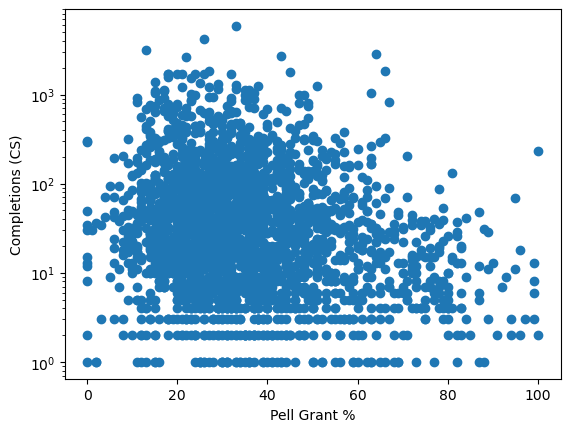

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis)
plt.xlabel('Pell Grant %')
plt.ylabel('Completions (CS)')
plt.yscale('log')

In [ ]:
# Make the plot only for institutions in South Carolina?

condition = (merged_new['STABBR'] == 'SC') & (merged_new['CIPCODE'] >= 11) & (merged_new['CIPCODE'] < 12)
south_carolina = merged_new[condition]
y_axis = south_carolina.groupby('CIPCODE')['CTOTALT'].sum()
x_axis = south_carolina.groupby('CIPCODE')['UPGRNTP'].mean()
x_axis.shape, y_axis.shape


((15,), (15,))

Text(0, 0.5, 'Completions (CS)')

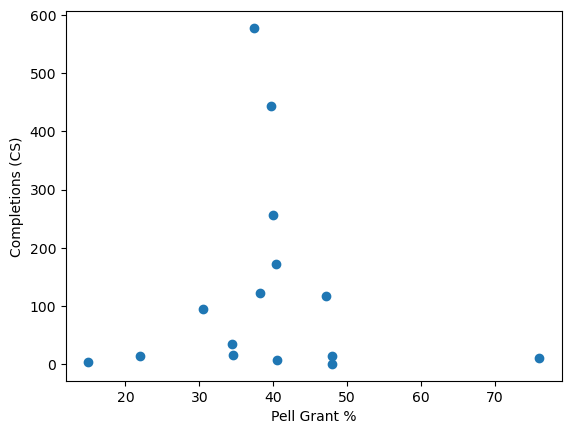

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis)
plt.xlabel('Pell Grant %')
plt.ylabel('Completions (CS)')

In [ ]:
# Which universties in South Carolina have the highest and lowest percentage of pell grants? 

def south_carolina(row):
    filtered = row['STABBR'] == 'SC'
    high = merged_new.groupby('STABBR')['UPGRNTP'].max()
    low = merged_new.groupby('STABBR')['UPGRNTP'].min()

In [ ]:
# Find institutions where >= x% of the students are on Pell Grants

x = 10
column_subset = merged[['INSTNM', 'UPGRNTP']]
condition = column_subset['UPGRNTP'] >= x
merged[condition]

,UNITID,XSCUGRAD,SCUGRAD,XSCUGFFN,SCUGFFN,XSCUGFFP,SCUGFFP,XSCFA2,SCFA2,XSCFA1N,...,NPT410,XNPT420,NPT420,XNPT430,NPT430,XNPT440,NPT440,XNPT450,NPT450,INSTNM
0,100654,R,5093,R,1525,R,30,R,5093.0,R,...,NaN,A,NaN,A,NaN,A,NaN,A,NaN,Alabama A & M University
1,100663,R,13878,R,2102,R,15,R,13878.0,R,...,NaN,A,NaN,A,NaN,A,NaN,A,NaN,University of Alabama at Birmingham
2,100690,R,298,R,0,R,0,R,298.0,R,...,NaN,A,NaN,A,NaN,A,NaN,A,NaN,Amridge University
3,100706,R,8027,R,1328,R,17,R,8027.0,R,...,NaN,A,NaN,A,NaN,A,NaN,A,NaN,University of Alabama in Huntsville
4,100724,R,3614,R,926,R,26,R,3614.0,R,...,NaN,A,NaN,A,NaN,A,NaN,A,NaN,Alabama State University
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5729,496052,R,36,R,8,R,22,A,NaN,A,...,NaN,A,NaN,A,NaN,A,NaN,A,NaN,Ruben's Five Star Academy
5732,496265,R,26,R,11,R,42,R,26.0,R,...,NaN,A,NaN,A,NaN,A,NaN,A,NaN,Triangle Tech-Chambersburg
5733,496283,R,16,R,6,R,38,R,16.0,R,...,NaN,A,NaN,A,NaN,A,NaN,A,NaN,Provo College-Idaho Falls Campus
5735,496326,R,22,R,7,R,32,R,22.0,R,...,NaN,A,NaN,A,NaN,A,NaN,A,NaN,Eagle Gate College-Boise Campus


In [ ]:
column_subset = merged[['INSTNM', 'UPGRNTP']]
condition = column_subset['INSTNM'] == 'Furman University'
column_subset[condition]

,INSTNM,UPGRNTP
2819,Furman University,11


In [ ]:
column_subset = merged[['INSTNM', 'UPGRNTP']]
condition = column_subset['INSTNM'] == 'Clemson University'
column_subset[condition]

,INSTNM,UPGRNTP
2809,Clemson University,15


In [ ]:
column_subset = merged[['INSTNM', 'UPGRNTP']]
condition = column_subset['INSTNM'] == 'Bob Jones University'
column_subset[condition]

,INSTNM,UPGRNTP
2801,Bob Jones University,9


In [ ]:
column_subset = merged[['INSTNM', 'UPGRNTP']]
condition = column_subset['INSTNM'] == 'Wofford College'
column_subset[condition]

,INSTNM,UPGRNTP
2852,Wofford College,18


In [ ]:
column_subset = merged[['INSTNM', 'UPGRNTP']]
condition = column_subset['INSTNM'] == 'Juniata College'
column_subset[condition]

,INSTNM,UPGRNTP
2659,Juniata College,26


In [ ]:
completions.groupby('UNITID').value_counts()

UNITID  CIPCODE  MAJORNUM  AWLEVEL  XCTOTALT  CTOTALT  XCTOTALM  CTOTALM  XCTOTALW  CTOTALW  XCAIANT  CAIANT  XCAIANM  CAIANM  XCAIANW  CAIANW  XCASIAT  CASIAT  XCASIAM  CASIAM  XCASIAW  CASIAW  XCBKAAT  CBKAAT  XCBKAAM  CBKAAM  XCBKAAW  CBKAAW  XCHISPT  CHISPT  XCHISPM  CHISPM  XCHISPW  CHISPW  XCNHPIT  CNHPIT  XCNHPIM  CNHPIM  XCNHPIW  CNHPIW  XCWHITT  CWHITT  XCWHITM  CWHITM  XCWHITW  CWHITW  XC2MORT  C2MORT  XC2MORM  C2MORM  XC2MORW  C2MORW  XCUNKNT  CUNKNT  XCUNKNM  CUNKNM  XCUNKNW  CUNKNW  XCNRALT  CNRALT  XCNRALM  CNRALM  XCNRALW  CNRALW  
100654  1.0999   1         5        R         9        R         1        R         8        R        1       Z        0       R        1       Z        0       Z        0       Z        0       R        4       Z        0       R        4       Z        0       Z        0       Z        0       Z        0       Z        0       Z        0       R        2       R        1       R        1       R        1       Z        0       R        1    

In [ ]:
condition = (merged_new['STABBR'] == 'SC') & (merged_new['CIPCODE'] >= 11) & (merged_new['CIPCODE'] < 12)
cs_majors = merged_new[condition]
y_axis = cs_majors.groupby('UNITID')['CTOTALT'].sum()
x_axis = cs_majors.groupby('UNITID') ['SCUGRAD'].mean()
x_axis.shape, y_axis.shape

((49,), (49,))

In [ ]:
x_axis.idxmax()

218663

Text(0, 0.5, 'Completions (CS)')

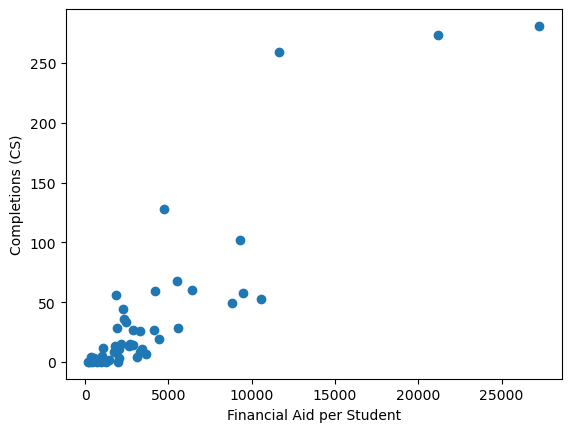

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis)
plt.xlabel('Financial Aid per Student')
plt.ylabel('Completions (CS)')

In [ ]:
condition = (merged_new['STABBR'] == 'SC')
institutions = merged_new[condition]# ['INSTNM']
y_axis = institutions.groupby('INSTNM')['GRBKAAT'].mean()
x_axis = institutions.groupby('INSTNM') ['SCUGRAD'].mean()
x_axis.shape, y_axis.shape

((62,), (62,))

/var/folders/_g/bhxqyzfn3tl8bx13c4flvydr0000gn/T/ipykernel_6509/3369554161.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(list(x_axis.index)[i][:8], (x_axis[i], y_axis[i]))


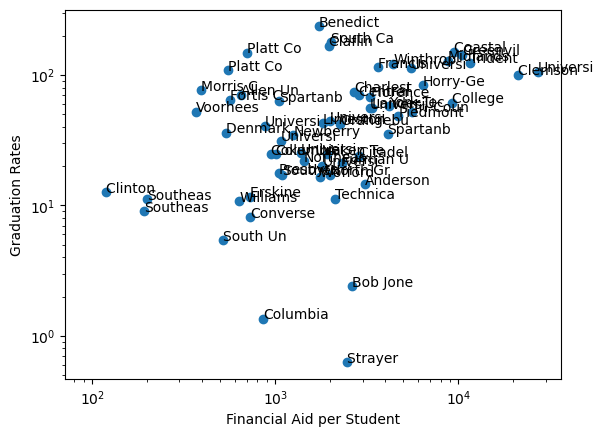

In [ ]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()

ax.scatter(x_axis, y_axis)
plt.xlabel('Financial Aid per Student')
plt.ylabel('Graduation Rates')

for i, txt in enumerate(x_axis): 
    ax.annotate(list(x_axis.index)[i][:8], (x_axis[i], y_axis[i]))

plt.yscale('log')
plt.xscale('log')

In [ ]:
institutions['INSTSIZE']

0       3
1       5
2       1
3       3
4       2
       ..
6435   -2
6436    1
6437   -2
6438   -1
6439    1
Name: INSTSIZE, Length: 6440, dtype: int64

# Southeast

In [190]:
condition = (merged_new['STABBR'].isin(['AL', 'AR', 'FL', 'GA', 'KY', 'LA', 'MS', 'NC', 'SC', 'TN', 'VA', 'WV']))
institutions = merged_new[condition]# ['INSTNM']
y_axis = institutions.groupby('INSTNM')['GRBKAAT'].mean()
x_axis = institutions.groupby('INSTNM') ['UPGRNTP'].mean()
size = institutions.groupby('INSTNM')['INSTSIZE'].mean()
x_axis.shape, y_axis.shape

((966,), (966,))

/var/folders/_g/bhxqyzfn3tl8bx13c4flvydr0000gn/T/ipykernel_6509/1509384370.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(txts[i][:8], (x_axis[i], y_axis[i]))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


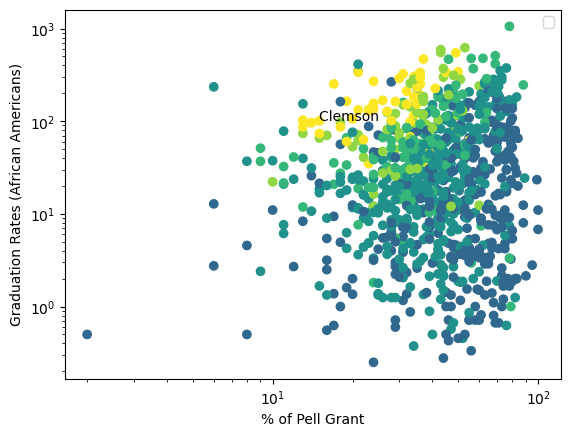

In [191]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()

ax.scatter(x_axis, y_axis, c=size)
plt.xlabel('% of Pell Grant')
plt.ylabel('Graduation Rates (African Americans)')

txts = list(x_axis.index)
for i, txt in enumerate(x_axis): 
    if txts[i].lower().startswith('clemson'):
        ax.annotate(txts[i][:8], (x_axis[i], y_axis[i]))

plt.yscale('log')
plt.xscale('log')
plt.legend()

In [192]:
condition = (merged_new['STABBR'].isin(['AL', 'AR', 'FL', 'GA', 'KY', 'LA', 'MS', 'NC', 'SC', 'TN', 'VA', 'WV']))
institutions = merged_new[condition]# ['INSTNM']
y_axis = institutions.groupby('INSTNM')['GRHISPT'].mean()
x_axis = institutions.groupby('INSTNM') ['UPGRNTP'].mean()
size = institutions.groupby('INSTNM')['INSTSIZE'].mean()
x_axis.shape, y_axis.shape

((966,), (966,))

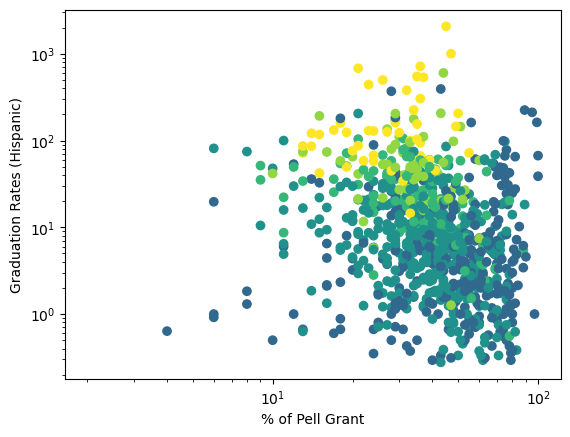

In [193]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()

ax.scatter(x_axis, y_axis, c=size)
plt.xlabel('% of Pell Grant')
plt.ylabel('Graduation Rates (Hispanic)')

#for i, txt in enumerate(x_axis): 
    #ax.annotate(list(x_axis.index)[i][:8], (x_axis[i], y_axis[i]))

plt.yscale('log')
plt.xscale('log')

In [194]:
condition = (merged_new['STABBR'].isin(['AL', 'AR', 'FL', 'GA', 'KY', 'LA', 'MS', 'NC', 'SC', 'TN', 'VA', 'WV']))
institutions = merged_new[condition]# ['INSTNM']

y_axis = institutions.groupby('INSTNM')['GRTOTLW'].mean()
x_axis = institutions.groupby('INSTNM') ['UPGRNTP'].mean()
size = institutions.groupby('INSTNM')['INSTSIZE'].mean()
x_axis.shape, y_axis.shape

((966,), (966,))

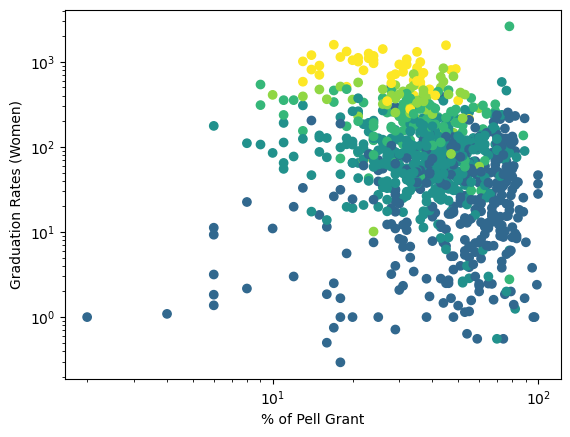

In [195]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()

ax.scatter(x_axis, y_axis, c=size)
plt.xlabel('% of Pell Grant')
plt.ylabel('Graduation Rates (Women)')

#for i, txt in enumerate(x_axis): 
    #ax.annotate(list(x_axis.index)[i][:8], (x_axis[i], y_axis[i]))

plt.yscale('log')
plt.xscale('log')

In [196]:
condition = (merged_new['STABBR'].isin(['AL', 'AR', 'FL', 'GA', 'KY', 'LA', 'MS', 'NC', 'SC', 'TN', 'VA', 'WV']))
institutions = merged_new[condition]# ['INSTNM']

y_axis = institutions.groupby('INSTNM')['GRTOTLW'].mean()
x_axis = institutions.groupby('INSTNM') ['UFLOANP'].mean()
size = institutions.groupby('INSTNM')['INSTSIZE'].mean()
x_axis.shape, y_axis.shape

((966,), (966,))

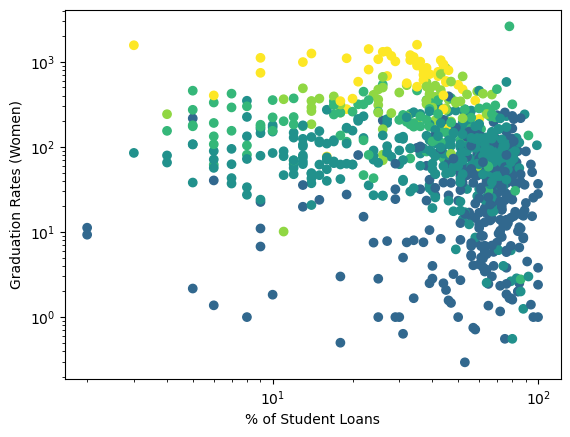

In [197]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()

ax.scatter(x_axis, y_axis, c=size)
plt.xlabel('% of Student Loans')
plt.ylabel('Graduation Rates (Women)')

#for i, txt in enumerate(x_axis): 
    #ax.annotate(list(x_axis.index)[i][:8], (x_axis[i], y_axis[i]))

plt.yscale('log')
plt.xscale('log')

In [198]:
condition = (merged_new['STABBR'].isin(['AL', 'AR', 'FL', 'GA', 'KY', 'LA', 'MS', 'NC', 'SC', 'TN', 'VA', 'WV']))
institutions = merged_new[condition]# ['INSTNM']

y_axis = institutions.groupby('INSTNM')['GRHISPT'].mean()
x_axis = institutions.groupby('INSTNM') ['UFLOANP'].mean()
size = institutions.groupby('INSTNM')['INSTSIZE'].mean()
x_axis.shape, y_axis.shape

((966,), (966,))

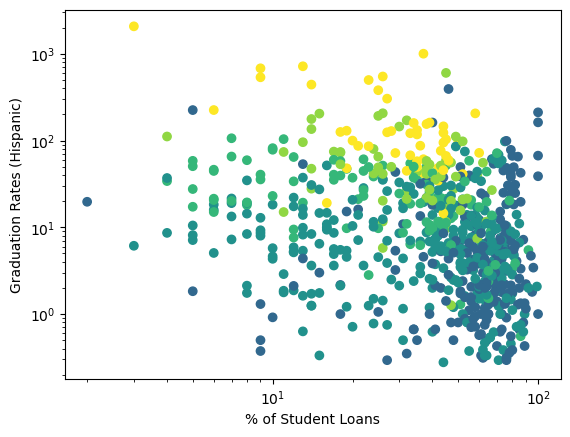

In [199]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()

ax.scatter(x_axis, y_axis, c=size)
plt.xlabel('% of Student Loans')
plt.ylabel('Graduation Rates (Hispanic)')

#for i, txt in enumerate(x_axis): 
    #ax.annotate(list(x_axis.index)[i][:8], (x_axis[i], y_axis[i]))

plt.yscale('log')
plt.xscale('log')

In [200]:
condition = (merged_new['STABBR'].isin(['AL', 'AR', 'FL', 'GA', 'KY', 'LA', 'MS', 'NC', 'SC', 'TN', 'VA', 'WV']))
institutions = merged_new[condition]# ['INSTNM']

y_axis = institutions.groupby('INSTNM')['GRBKAAT'].mean()
x_axis = institutions.groupby('INSTNM') ['UFLOANP'].mean()
size = institutions.groupby('INSTNM')['INSTSIZE'].mean()
x_axis.shape, y_axis.shape

((966,), (966,))

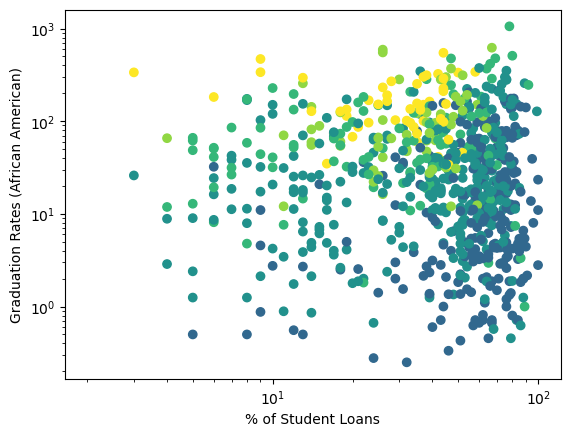

In [201]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()

ax.scatter(x_axis, y_axis, c=size)
plt.xlabel('% of Student Loans')
plt.ylabel('Graduation Rates (African American)')

#for i, txt in enumerate(x_axis): 
    #ax.annotate(list(x_axis.index)[i][:8], (x_axis[i], y_axis[i]))

plt.yscale('log')
plt.xscale('log')